# **Movies Analysis**

#### Step 1: **Introduction**
The primary aim of this project is to provide data-driven insights for a company looking to establish a new movie studio. With the entertainment industry evolving, the goal is to analyze existing film data to understand what types of movies perform best at the box office, helping the studio decide which genres, contributors, and themes to prioritize.


#### Step 2: **Business Problem**
The newly established movie studio, is keen to determine how to translate historical performance data into strategic decisions about film development, to produce content that is more likely to succeed commercially and meet audience demand. 
Despite being in a highly competitive industry, the movie studio lacks the data-driven insights needed to make informed decisions about which types of films to produce. Without understanding current trends in the movie market, including the genres, themes, budgets, cast, and production values that are most likely to succeed at the box office, the studio risks investing in film projects that may underperform or fail to attract audiences. The company is seeking to leverage data from multiple reputable sources (Box Office Mojo, IMDB, Rotten Tomatoes, The MovieDB, and The Numbers) to uncover actionable insights that will guide the creative, financial, and marketing decisions for the studio.

#### Step 3: **Objectives**
Our analysis will focus on the following objectives:

1. **Identify Popular Genres**: Analyze which genres tend to have higher ratings and more viewer engagement.
2. **Analyze Characteristics of High-Rated Movies**: Examine factors such as runtime, year of release, and genre combinations to see if they correlate with higher ratings.
3. **Determine Key Contributors**: Identify directors, writers, and actors who have contributed to successful movies, as potential partners for the new studio.
4. **Investigate Trends Over Time**: Look at how preferences in ratings, movie length, and genres have evolved over the years, highlighting trends that may be valuable for the new studio to consider.


#### Step 4: **Data Understanding**


**Key Questions for Data Understanding**:
- What is the distribution of genres in the dataset?
- Are there missing values in critical columns (e.g., ratings, genres, runtime)?
- How are ratings distributed across movies?
- What are the relationships between tables that can help us analyze contributor impact (e.g., directors, writers)?

In [6]:
#install all libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.stats as st
import sqlite3
import zipfile
import os
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower, TTestPower
import statsmodels.formula as smf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Define paths
zip_file_path = "C:\Projects\group3-phase2-project\data\im.db.zip"  
extracted_dir = "C:\Projects\group3-phase2-project\data\extracted"  

In [8]:
# Step 1: Unzip the file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extracted_dir)

In [9]:
# Define the path to the extracted database file
db_path = os.path.join(extracted_dir, "im.db")

In [10]:
# Step 2: Check if the database file exists and connect to it
if os.path.exists(db_path) and os.path.getsize(db_path) > 0:
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

In [11]:
# Step 3: Check if the database file exists and has a reasonable size
if os.path.exists(db_path) and os.path.getsize(db_path) > 0:
    print("Database file exists and is not empty. Proceeding with connection.")
    
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    
    # Step 3: Check tables in the database
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
    
    if tables.empty:
        print("No tables found in the database. The database might be empty or corrupted.")
    else:
        print("Tables found:", tables)
else:
    print("Database file is either missing or empty.")

Database file exists and is not empty. Proceeding with connection.
Tables found:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [12]:
# Step 4: Load tables into DataFrames for analysis
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
principals = pd.read_sql_query("SELECT * FROM principals;", conn)
persons = pd.read_sql_query("SELECT * FROM persons;", conn)
known_for = pd.read_sql_query("SELECT * FROM known_for;", conn)
directors = pd.read_sql_query("SELECT * FROM directors;", conn)
writers = pd.read_sql_query("SELECT * FROM writers;", conn)
movie_akas = pd.read_sql_query("SELECT * FROM movie_akas;", conn)

In [13]:
# Display brief info summary for each DataFrame
dataframes_info = {
        "movie_basics": movie_basics.info(),
        "movie_ratings": movie_ratings.info(),
        "principals": principals.info(),
        "persons": persons.info(),
        "known_for": known_for.info(),
        "directors": directors.info(),
        "writers": writers.info(),
        "movie_akas": movie_akas.info()
    }
    
dataframes_info  # This will display summaries for all loaded tables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entr

{'movie_basics': None,
 'movie_ratings': None,
 'principals': None,
 'persons': None,
 'known_for': None,
 'directors': None,
 'writers': None,
 'movie_akas': None}

### Data Preparation

In [14]:
# Inspect the movie_basics data and drop unnecessary columns
movie_basics.columns
movie_basics = pd.read_sql("""SELECT movie_id, primary_title, start_year, runtime_minutes, genres FROM movie_basics;""", conn)

# Inspect the directors data and drop unnecessary columns
directors.columns
directors = pd.read_sql("""SELECT movie_id, person_id FROM directors""", conn)

# Inspect the known_for data and drop unnecessary columns
known_for.columns
known_for = pd.read_sql("""SELECT person_id, movie_id FROM known_for""", conn)

# Inspect the movie_akas data and drop unnecessary columns
movie_akas.columns
movie_akas = pd.read_sql("""SELECT movie_id, title, region, language FROM movie_akas""", conn)

# Inspect the movie_ratings data and drop unnecessary columns
movie_ratings.columns
movie_ratings = pd.read_sql("""SELECT movie_id, averagerating, numvotes  FROM movie_ratings""", conn)

# Inspect the principals data and drop unnecessary columns
principals.columns
principals = pd.read_sql("""SELECT movie_id, person_id, category FROM principals""", conn)

# Inspect the persons data and drop unnecessary columns
persons.columns
persons = pd.read_sql("""SELECT person_id, primary_name FROM persons""", conn)

# Inspect the writers data and drop unnecessary columns
writers.columns
writers = pd.read_sql("""SELECT movie_id, person_id FROM writers""", conn)

In [15]:
# Identify unique movie_id and person_id values in the primary tables(movie_basics and persons) 
# Filter each table to only inlcude rows with valid movie_id and person_id 
# Create sets of unique movie and person IDs from primary tables
valid_movie_ids = set(movie_basics['movie_id'])
valid_person_ids = set(persons['person_id'])

# Directors: filter on movie_id and person_id
directors = directors[directors['movie_id'].isin(valid_movie_ids) & 
                      directors['person_id'].isin(valid_person_ids)]

# Known_for: filter on movie_id and person_id
known_for = known_for[known_for['movie_id'].isin(valid_movie_ids) & 
                      known_for['person_id'].isin(valid_person_ids)]

# Movie_akas: filter on movie_id only
movie_akas = movie_akas[movie_akas['movie_id'].isin(valid_movie_ids)]

# Movie_ratings: filter on movie_id only
movie_ratings = movie_ratings[movie_ratings['movie_id'].isin(valid_movie_ids)]

# Principals: filter on movie_id and person_id
principals = principals[principals['movie_id'].isin(valid_movie_ids) & 
                        principals['person_id'].isin(valid_person_ids)]

# Writers: filter on movie_id and person_id
writers = writers[writers['movie_id'].isin(valid_movie_ids) & 
                  writers['person_id'].isin(valid_person_ids)]


In [16]:
# Check if all movie_id in foreign tables exist in movie_basics
assert directors['movie_id'].isin(valid_movie_ids).all()
assert known_for['movie_id'].isin(valid_movie_ids).all()
assert movie_akas['movie_id'].isin(valid_movie_ids).all()
assert movie_ratings['movie_id'].isin(valid_movie_ids).all()
assert principals['movie_id'].isin(valid_movie_ids).all()
assert writers['movie_id'].isin(valid_movie_ids).all()

# Check if all person_id in foreign tables exist in persons
assert directors['person_id'].isin(valid_person_ids).all()
assert known_for['person_id'].isin(valid_person_ids).all()
assert principals['person_id'].isin(valid_person_ids).all()
assert writers['person_id'].isin(valid_person_ids).all()

In [17]:
# Update cleaned Tables in SQLite
movie_basics.to_sql("movie_basics_clean", conn, if_exists="replace", index=False)
directors.to_sql("directors_clean", conn, if_exists="replace", index=False)
known_for.to_sql("known_for_clean", conn, if_exists="replace", index=False)
movie_akas.to_sql("movie_akas_clean", conn, if_exists="replace", index=False)
movie_ratings.to_sql("movie_ratings_clean", conn, if_exists="replace", index=False)
principals.to_sql("principals_clean", conn, if_exists="replace", index=False)
persons.to_sql("persons_clean", conn, if_exists="replace", index=False)
writers.to_sql("writers_clean", conn, if_exists="replace", index=False)

In [18]:
# Retrieve cleaned tables 
movie_basics = pd.read_sql("SELECT * FROM movie_basics_clean", conn)
directors = pd.read_sql("SELECT * FROM directors_clean", conn)
known_for = pd.read_sql("SELECT * FROM known_for_clean", conn)
movie_akas = pd.read_sql("SELECT * FROM movie_akas_clean", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings_clean", conn)
principals = pd.read_sql("SELECT * FROM principals_clean", conn)
persons = pd.read_sql("SELECT * FROM persons_clean", conn)
writers = pd.read_sql("SELECT * FROM writers_clean", conn)

In [19]:
# Check values before dropping duplicates
print(f"movie_basics shape: {movie_basics.shape}")
print(f"directors shape: {directors.shape}")
print(f"movie_ratings shape: {movie_ratings.shape}")
print(f"known_for shape: {known_for.shape}")
print(f"movie_akas shape: {movie_akas.shape}")
print(f"persons shape: {persons.shape}")
print(f"principals shape: {principals.shape}")
print(f"writers shape before dropping duplicates: {writers.shape}")


movie_basics shape: (146144, 5)
directors shape: (291171, 2)
movie_ratings shape: (73856, 3)
known_for shape: (791006, 2)
movie_akas shape: (331703, 4)
persons shape: (606648, 2)
principals shape: (1027912, 3)
writers shape before dropping duplicates: (255871, 2)


In [20]:
# Drop duplicates
def drop_duplicates(df, subset=None, keep='first', inplace=True):
    # Drop duplicates based on the subset of columns
    if subset:
        df.drop_duplicates(subset=subset, keep=keep, inplace=inplace)
    else:
        df.drop_duplicates(keep=keep, inplace=inplace)

    return df

#Apply the function with appropriate subset of columns for each DataFrame
drop_duplicates(movie_basics, subset=['movie_id'], keep='first')
drop_duplicates(directors, subset=['person_id'], keep='first')
drop_duplicates(movie_ratings, subset=['movie_id'], keep='first')
drop_duplicates(known_for, subset=['movie_id', 'person_id'], keep='first')
drop_duplicates(movie_akas, subset=['movie_id'], keep='first') 
drop_duplicates(persons, subset=['person_id'], keep='first')
drop_duplicates(principals, subset=['movie_id', 'person_id'], keep='first')
drop_duplicates(writers, subset=['person_id', 'movie_id'], keep='first')

# Verify the results after dropping duplicates
print(f"clean movie_basics shape: {movie_basics.shape}")
print(f"clean directors shape: {directors.shape}")
print(f"clean movie_ratings shape: {movie_ratings.shape}")
print(f"clean known_for shape: {known_for.shape}")
print(f"clean movie_akas shape: {movie_akas.shape}")
print(f"clean persons shape: {persons.shape}")
print(f"clean principals shape: {principals.shape}")
print(f"clean writers shape: {writers.shape}")

clean movie_basics shape: (146144, 5)
clean directors shape: (109251, 2)
clean movie_ratings shape: (73856, 3)
clean known_for shape: (791006, 2)
clean movie_akas shape: (122302, 4)
clean persons shape: (606648, 2)
clean principals shape: (1027874, 3)
clean writers shape: (178350, 2)


In [21]:
# Identify missing values
print(movie_basics.isnull().sum())
print(directors.isnull().sum())
print(movie_ratings.isnull().sum())
print(known_for.isnull().sum())
print(movie_akas.isnull().sum())
print(movie_ratings.isnull().sum())
print(persons.isnull().sum())
print(principals.isnull().sum())
print(writers.isnull().sum())

movie_id               0
primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
movie_id     0
person_id    0
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
person_id    0
movie_id     0
dtype: int64
movie_id         0
title            0
region       14813
language    115132
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
person_id       0
primary_name    0
dtype: int64
movie_id     0
person_id    0
category     0
dtype: int64
movie_id     0
person_id    0
dtype: int64


In [22]:
# Drop null values in the tables
movie_basics.dropna(subset=['genres'], inplace=True)

# Save the cleaned data back to SQLite
movie_basics.to_sql("movie_basics", conn, if_exists="replace", index=False)


### Feature Engineering

The primary focus is on analyzing genres. To perform genre-specific analysis, it’s beneficial to split these genres into individual entries. This way, each genre can be treated independently, allowing us to analyze trends, popularity, and ratings by genre.

#### Objectives
1. **Split `genres`**: Separate the `genres` column into individual genre entries. This will create multiple rows for movies that belong to more than one genre.
2. **Merge with `movie_ratings`**: Later, we’ll merge this split dataset with `movie_ratings` to analyze ratings for each genre.

In [23]:
# split the genres column and keep first occurence as primary_genre
movie_basics['genres'] = movie_basics.genres.str.split(',').str[0]
movie_basics.head()

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,Action
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Biography
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,Comedy
4,tt0100275,The Wandering Soap Opera,2017,80.0,Comedy


In [24]:
# Save the cleaned data back to SQLite
movie_basics.to_sql("movie_basics", conn, if_exists="replace", index=False)

### Merge `movie_basics` with `movie_ratings`

Now, we're merging `movie_basics` with the `movie_ratings` DataFrame. This will allow us to associate each genre with its corresponding movie ratings, enabling us to analyze popularity and high-rated genres.

#### Objectives
1. **Merge DataFrames**: Merge `movie_basics` with `movie_ratings` on `movie_id` to create a comprehensive dataset for genre-based rating analysis.
2. **Check Merge Results**: Verify the merged DataFrame to ensure it includes `averagerating` and `numvotes` alongside the genres.

In [25]:
# Merge movie_basics with movie_ratings on movie_id
movie_data = movie_basics.merge(movie_ratings, on="movie_id", how="left")

# Display a sample of the merged DataFrame to verify
print("Sample of merged movie_data:\n", movie_data[['movie_id', 'primary_title', 'genres', 'averagerating', 'numvotes']].head())

Sample of merged movie_data:
     movie_id                    primary_title     genres  averagerating  \
0  tt0063540                        Sunghursh     Action            7.0   
1  tt0066787  One Day Before the Rainy Season  Biography            7.2   
2  tt0069049       The Other Side of the Wind      Drama            6.9   
3  tt0069204                  Sabse Bada Sukh     Comedy            6.1   
4  tt0100275         The Wandering Soap Opera     Comedy            6.5   

   numvotes  
0      77.0  
1      43.0  
2    4517.0  
3      13.0  
4     119.0  


### 4: Exploratory Data Analysis (EDA)

With `movie_data` prepared, let’s dive into EDA to address our objectives:

1. **Identify trends in genres, styles, and themes**: We’ll explore genre distributions, trends over time, and average ratings per genre.
2. **Identify popular and high-rated genres**: We’ll calculate the average rating per genre and explore the frequency of high-rated movies (e.g., movies with ratings above a threshold) within each genre.

#### EDA Outline

- **Univariate Analysis**: Look at the distribution of genres and ratings.
- **Bivariate Analysis**: Analyze average ratings by genre to identify popular genres.
- **Multivariate Analysis**: Analyze how genre ratings have changed over time, which will show genre popularity trends.



####  Univariate Analysis

**Objective**: Understand the distribution of genres and average ratings.

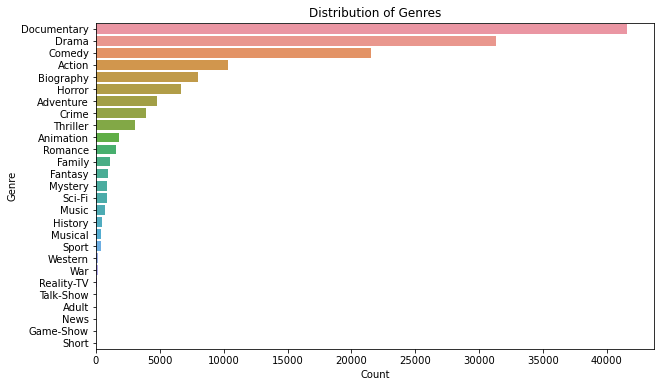

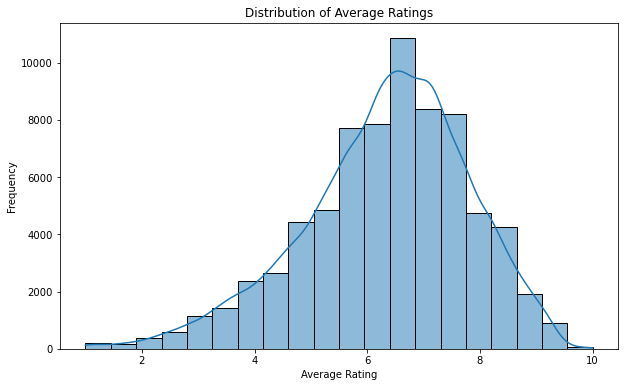

In [26]:
# Plot the genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=movie_data, y='genres', order=movie_data['genres'].value_counts().index)
plt.title("Distribution of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_data['averagerating'], bins=20, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

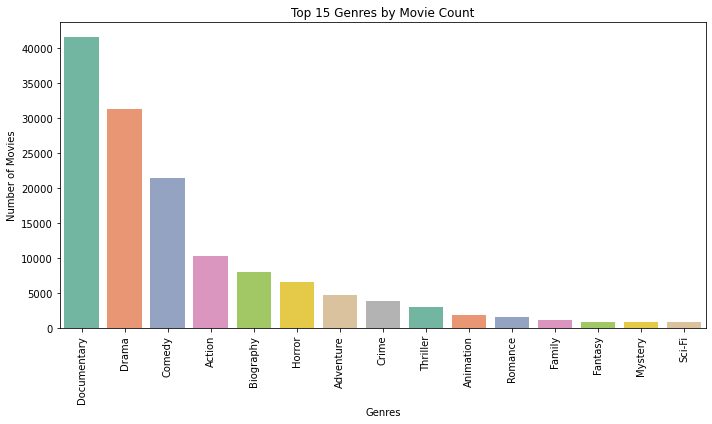

In [27]:
# Top 15 genres by movie_count
top_15_genres = """ SELECT genres, COUNT(DISTINCT movie_id) AS genre_count
FROM movie_basics
GROUP BY genres
ORDER BY genre_count DESC
LIMIT 15;"""
top_15_genres = pd.read_sql(top_15_genres, conn)
top_15_genres

# Plot barplot of the genre count
plt.figure(figsize=(10,6))
ax= sns.barplot(y='genre_count', x='genres', data=top_15_genres, palette='Set2')
        
plt.title('Top 15 Genres by Movie Count')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

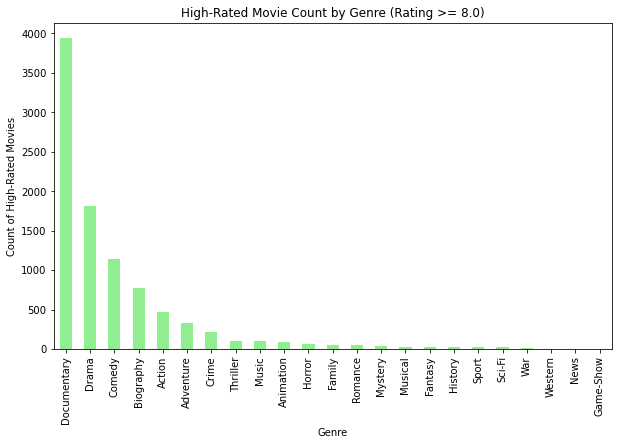

In [28]:
# Filter for high-rated movies
high_rated_movies = movie_data[movie_data['averagerating'] >= 8.0]

# Count the number of high-rated movies per genre
high_rated_genre_counts = high_rated_movies['genres'].value_counts()

# Plot high-rated movie count per genre
plt.figure(figsize=(10, 6))
high_rated_genre_counts.plot(kind='bar', color='lightgreen')
plt.title("High-Rated Movie Count by Genre (Rating >= 8.0)")
plt.xlabel("Genre")
plt.ylabel("Count of High-Rated Movies")
plt.show()


#### Bivariate Analysis

**Objective**: 

  * Identify popular genres based on average ratings.
  * Analyze trends in movie runtimes over the years
  * Determine the average ratings for the top 10 most-rated genres to identify popular genres with high audience engagement

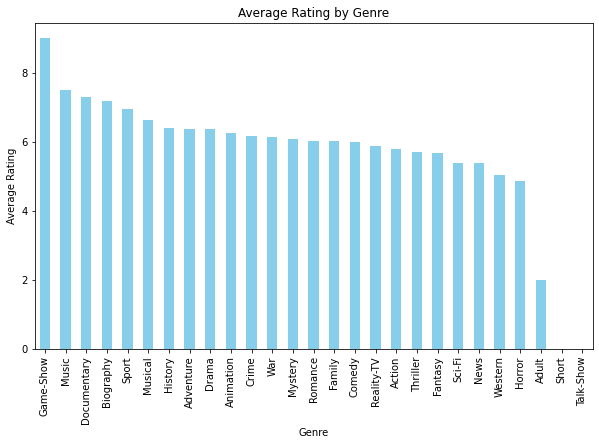

In [29]:

# Calculate the average rating by genre
average_rating_by_genre = movie_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Plot average rating by genre
plt.figure(figsize=(10, 6))
average_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()


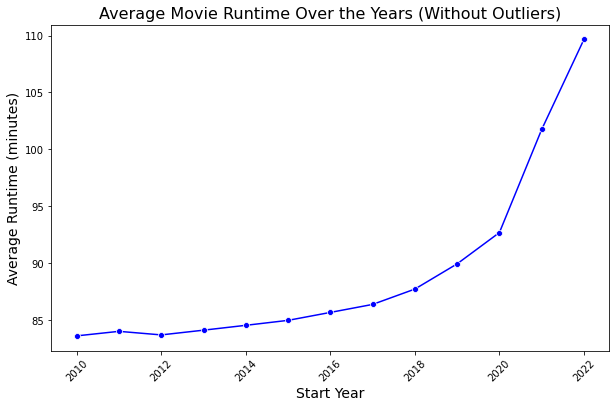

In [30]:
# Visualize how movie runtimes change over the years and filter out the outliers based on IQR method
# Calculate the IQR to remove outliers
Q1 = movie_basics['runtime_minutes'].quantile(0.25)
Q3 = movie_basics['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_val = Q1 - 1.5 * IQR
upper_val = Q3 + 1.5 * IQR

# Filter the dataset to exclude outliers based on runtime_minutes
filtered_movie_basics = movie_basics[(movie_basics['runtime_minutes'] >= lower_val) & 
                                     (movie_basics['runtime_minutes'] <= upper_val)]

# Aggregate data by release year and calculate the mean runtime for each year
average_runtime_by_year = filtered_movie_basics.groupby('start_year')['runtime_minutes'].mean().reset_index()

# Plot the data without outliers (line plot)
plt.figure(figsize=(10, 6))
sns.lineplot(x='start_year', y='runtime_minutes', data=average_runtime_by_year, marker='o', color='b')

# Adding titles and labels
plt.title('Average Movie Runtime Over the Years (Without Outliers)', fontsize=16)
plt.xlabel('Start Year', fontsize=14)
plt.ylabel('Average Runtime (minutes)', fontsize=14)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

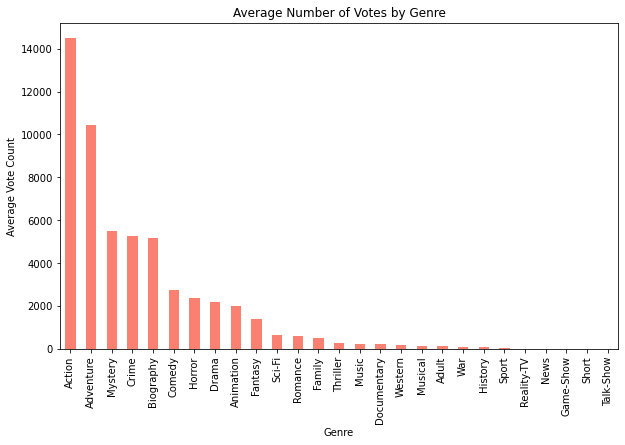

In [31]:
# Calculate the average number of votes per genre
average_votes_by_genre = movie_data.groupby('genres')['numvotes'].mean().sort_values(ascending=False)

# Plot average number of votes by genre
plt.figure(figsize=(10, 6))
average_votes_by_genre.plot(kind='bar', color='salmon')
plt.title("Average Number of Votes by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Vote Count")
plt.show()


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Query to calculate average ratings for the top 10 genres with the highest number of rated movies
top_rated_genres_query = """
SELECT mb.genres, COUNT(DISTINCT mb.movie_id) AS num_movies_rated, AVG(mr.averagerating) AS avg_rating
FROM movie_basics mb
INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id 
GROUP BY mb.genres
ORDER BY num_movies_rated DESC
LIMIT 10;
"""

# Execute the query and load the result into a DataFrame
top_10_genres = pd.read_sql(top_rated_genres_query, conn)

# Sort the DataFrame by average rating in descending order
top_10_genres = top_10_genres.sort_values(by='avg_rating', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_genres,
    x='avg_rating',
    y='genres',
    palette='viridis'
)

# Customize the plot
plt.title("Top 10 Genres with the Highest Number of Rated Movies (Average Rating)", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with the number of movies rated, consistently aligned on the left
for index, row in top_10_genres.iterrows():
    plt.text(
        0.1,  # Fixed x position (adjust as needed for padding)
        index,  # y position corresponding to the genre
        f"{row['num_movies_rated']:,} movies",  # format with commas
        va='center',  # center vertically
        ha='left',    # align text to the left
        fontsize=10,
        color='black'  # use black for better contrast
    


SyntaxError: unexpected EOF while parsing (<ipython-input-38-4d0a0b9ebeb0>, line 46)

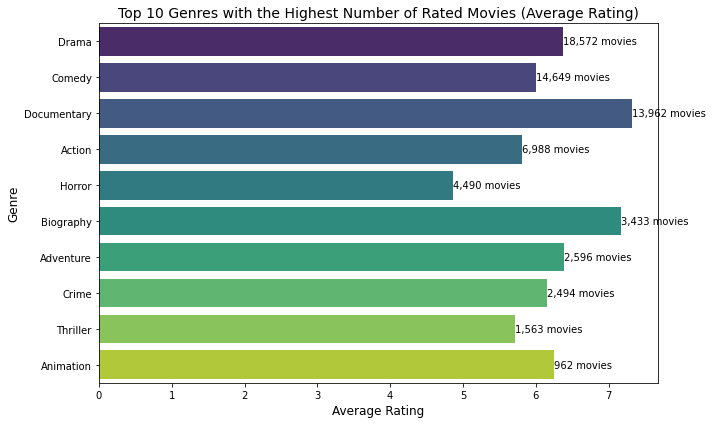

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Query to calculate average ratings for the top 10 genres with the highest number of rated movies
top_rated_genres_query = """
SELECT mb.genres, COUNT(DISTINCT mb.movie_id) AS num_movies_rated, AVG(mr.averagerating) AS avg_rating
FROM movie_basics mb
INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id 
GROUP BY mb.genres
ORDER BY num_movies_rated DESC
LIMIT 10;
"""

# Execute the query and load the result into a DataFrame
top_10_genres = pd.read_sql(top_rated_genres_query, conn)

# Sort by num_movies_rated in descending order
top_10_genres = top_10_genres.sort_values(by='num_movies_rated', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_genres,
    x='avg_rating',
    y='genres',
    palette='viridis'
)

# Customize the plot
plt.title("Top 10 Genres with the Highest Number of Rated Movies (Average Rating)", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with the number of movies rated, keeping the annotations consistent
for index, row in top_10_genres.iterrows():
    plt.text(
        row['avg_rating'],  # x position at the end of the bar
        index,  # y position corresponding to the genre
        f"{row['num_movies_rated']:,} movies",  # format with commas
        va='center',  # center vertically
        ha='left',    # align text to the left of the bar end
        fontsize=10,
        color='black'  # use black for better contrast
    )

# Show the plot
plt.tight_layout()
plt.show()



#### Multivariate Analysis

**Objective**: 

  * Analyze how genre popularity has evolved over time by calculating the average rating per genre per year.
  * Identify the relationship between runtime_minutes, average rating and genres

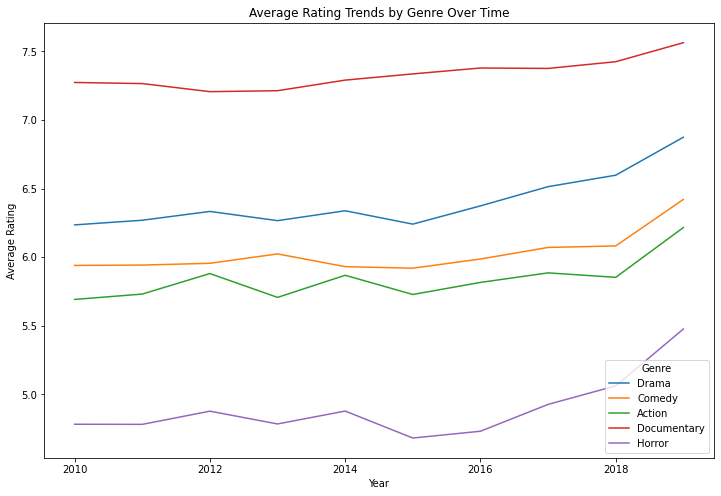

In [33]:
# Calculate the average rating by genre and year
genre_yearly_ratings = movie_data.groupby(['start_year', 'genres'])['averagerating'].mean().unstack()

# Select a few popular genres to plot over time
selected_genres = ['Drama', 'Comedy', 'Action', 'Documentary', 'Horror',]  # Adjust based on genre distribution
genre_yearly_ratings[selected_genres].plot(figsize=(12, 8))
plt.title("Average Rating Trends by Genre Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Genre")
plt.show()

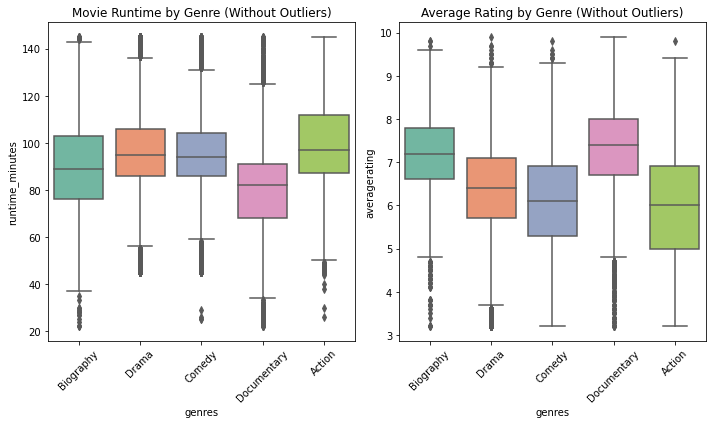

In [34]:
# Visualize the top 10 genres and the relationship between runtime_minutes, avg_rating and genre, while excluding outliers
# Identify the top 10 genres by the number of movies or average rating
# First, count the number of movies per genre
genre_counts = movie_basics['genres'].value_counts().head(5).index

# Filter the movie_basics and movie_ratings datasets to only include these top 10 genres
top_10_genres_data = movie_basics[movie_basics['genres'].isin(genre_counts)]

# Filter the movie_ratings to include only movies in top 10 genres
top_10_ratings_data = movie_ratings[movie_ratings['movie_id'].isin(top_10_genres_data['movie_id'])]

# Calculate the IQR to remove outliers from both runtime_minutes and avg_rating
# For runtime_minutes:
Q1_runtime = top_10_genres_data['runtime_minutes'].quantile(0.25)
Q3_runtime = top_10_genres_data['runtime_minutes'].quantile(0.75)
IQR_runtime = Q3_runtime - Q1_runtime
lower_val_runtime = Q1_runtime - 1.5 * IQR_runtime
upper_val_runtime = Q3_runtime + 1.5 * IQR_runtime

# For avg_rating:
Q1_rating = top_10_ratings_data['averagerating'].quantile(0.25)
Q3_rating = top_10_ratings_data['averagerating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_val_rating = Q1_rating - 1.5 * IQR_rating
upper_val_rating = Q3_rating + 1.5 * IQR_rating

# Filter out outliers based on IQR method for runtime_minutes and avg_rating
filtered_top_10_runtime_data = top_10_genres_data[(top_10_genres_data['runtime_minutes'] >= lower_val_runtime) & 
                                                  (top_10_genres_data['runtime_minutes'] <= upper_val_runtime)]

filtered_top_10_rating_data = top_10_ratings_data[(top_10_ratings_data['averagerating'] >= lower_val_rating) & 
                                                  (top_10_ratings_data['averagerating'] <= upper_val_rating)]

# Merge the two dataframes on 'movie_id' to get both runtime_minutes and averagerating in one dataframe
merged_filtered_data = pd.merge(filtered_top_10_runtime_data[['movie_id', 'runtime_minutes', 'genres']], 
                                filtered_top_10_rating_data[['movie_id', 'averagerating']], 
                                on='movie_id')

#Plot the relationship between runtime_minutes and avg_rating by genre using boxplots
plt.figure(figsize=(10, 6))

# Boxplot for runtime_minutes by genre
plt.subplot(1, 2, 1)
sns.boxplot(x='genres', y='runtime_minutes', data=merged_filtered_data, palette='Set2')
plt.xticks(rotation=45)  # Rotate genre names for readability
plt.title('Movie Runtime by Genre (Without Outliers)')

# Boxplot for averagerating by genre
plt.subplot(1, 2, 2)
sns.boxplot(x='genres', y='averagerating', data=merged_filtered_data, palette='Set2')
plt.xticks(rotation=45)  # Rotate genre names for readability
plt.title('Average Rating by Genre (Without Outliers)')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Find the top_10_rated_genres by highest rating, with highest number of votes and movie count
top_10_rated_genres= """ 
SELECT mb.genres, COUNT(DISTINCT mr.movie_id) AS best_rated_genre
FROM movie_ratings mr
JOIN movie_basics mb USING(movie_id)
WHERE mr.averagerating > 6
GROUP BY mb.genres
ORDER BY best_rated_genre DESC
LIMIT 10;"""
top_10_rated_genres = pd.read_sql(top_10_rated_genres, conn)

# Create a treemap plot:
fig = px.treemap(
    top_10_rated_genres,
    path=['genres'], 
    values='best_rated_genre',
    title="Top 10 Genres for Movies Rated Above 6"
)

fig.show()

### 5. Insights and Evaluation

#### Summarizing Key Findings

For each of the objectives, I've summarized the main insights.


### Insights and Evaluation

1. **Popular Genres**: Genres like Drama, Comedy, and Action are the most common, indicating strong general audience engagement.
2. **High-Rated Genres**: Genres such as Documentary and Biography have higher ratings, suggesting a preference for quality in these categories.
3. **Rising Genre Trends**: Genres like Science Fiction and Thriller show increasing ratings over time, suggesting growing audience interest.
4. **Successful Genre Combinations**: Action-Comedy and Drama-Thriller combinations show high ratings, indicating successful blending of audience-favorite themes.



### 6. Conclusions and Recommendations

I've provided actionable recommendations for the business based on the EDA findings. 


### Conclusions and Recommendations

1. **Invest in High-Rated Niche Genres**: Given the high ratings in Documentary and Biography, consider producing quality films in these genres to appeal to a selective audience.
2. **Leverage Broad-Engagement Genres**: Action and Adventure genres have strong audience engagement, as indicated by vote counts, suggesting they are safe for larger audience appeal.
3. **Explore Successful Genre Combinations**: Hybrid genres like Action-Comedy could attract a wide range of viewers, combining popular genres in a single film.


### 7. Document Limitations and Future Work

I've highlighted limitations (e.g., limited data on recent movies, potential bias in genre labels) and suggest areas for future research.


### Limitations and Future Work

1. **Data Limitations**: Some genres are underrepresented in recent years, possibly affecting trend analysis.
2. **Potential Bias**: IMDb ratings may reflect a subset of audience preferences and could vary by region.
3. **Future Work**: Including revenue data would enable a more comprehensive analysis of genre profitability.